# Generador de archivos para Redes

## Aclaracion:
Este modelo fue usado para generar los 4 archivos entregados train_350, test_350, train_500 y test_500 y otos mas.

El unico cambio que se raliza para cambiar los archivos es en

review_split['review_es'] = review_split['review_es'].apply(lambda x: x[:500])

review_split['analize'] = review_split['review_es'].apply(analisis,b=analyzer)

donde x[:numero] representa cantidad del texto con la que nos quedamos(aparece 2 veces para los archivos train y test).

Tambien se modifica los nombres se modifican los nomres de los archivos de los archivos generados segun la cantidad representada y el tipo de archivo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras 

import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras.layers import Embedding


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.pipeline import make_pipeline

from sklearn.metrics import f1_score,  recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from pysentimiento import create_analyzer
import transformers

In [2]:
transformers.logging.set_verbosity(transformers.logging.ERROR)

analyzer = create_analyzer(task="sentiment", lang="es")

In [3]:
review = pd.read_csv('datasets/train.csv') 
review_t = pd.read_csv('datasets/test.csv')
review_orig = review_t.copy()
review['sentimiento'] = review['sentimiento'].map({'positivo':1,'negativo':0},na_action=None)
review.drop('ID', axis='columns', inplace=True)
review_t.drop('ID', axis='columns', inplace=True)
review.head()

,review_es,sentimiento
0,Uno de los otros críticos ha mencionado que de...,1
1,Una pequeña pequeña producción.La técnica de f...,1
2,Pensé que esta era una manera maravillosa de p...,1
3,"Básicamente, hay una familia donde un niño peq...",0
4,"El ""amor en el tiempo"" de Petter Mattei es una...",1


In [4]:
def metricas(y_pred,y_test):

  print(classification_report(y_test,y_pred))
  
  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

In [5]:
def analisis(a,b):
    valor  = b.predict(a).probas
    return [valor['POS'],valor['NEU'],valor['NEG']]
target='sentimiento'
review_split = review
#review_split = review_split.sample(frac=0.5, random_state=1)
#review_split=review.drop([target], axis='columns', inplace=False)
sentimientos = review_split[target].copy()
review_split=review_split.drop([target], axis='columns', inplace=False)
review_split['review_es'] = review_split['review_es'].apply(lambda x: x[:500])
review_split['analize'] = review_split['review_es'].apply(analisis,b=analyzer)
review_split['POS'] = review_split['analize'].apply(lambda x: x[0])
review_split['NEU'] = review_split['analize'].apply(lambda x: x[1])
review_split['NEG'] = review_split['analize'].apply(lambda x: x[2])
review_split['prediccion'] = review_split['analize'].apply(lambda x: x[0]>x[2])
review_split.head()

,review_es,analize,POS,NEU,NEG,prediccion
0,Uno de los otros críticos ha mencionado que de...,"[0.07907993346452713, 0.40571466088294983, 0.5...",0.079080,0.405715,0.515205,False
1,Una pequeña pequeña producción.La técnica de f...,"[0.9583470225334167, 0.03794402629137039, 0.00...",0.958347,0.037944,0.003709,True
2,Pensé que esta era una manera maravillosa de p...,"[0.7042222619056702, 0.2659737169742584, 0.029...",0.704222,0.265974,0.029804,True
3,"Básicamente, hay una familia donde un niño peq...","[0.00320177199319005, 0.052839115262031555, 0....",0.003202,0.052839,0.943959,False
4,"El ""amor en el tiempo"" de Petter Mattei es una...","[0.8379440903663635, 0.14889763295650482, 0.01...",0.837944,0.148898,0.013158,True


In [6]:
    

# for i in review_split.row():
#     valores = analyzer.predict(i['review_es']).probas
#     valores_return =[valores['POS'],valores['NEU'],valores['NEG']]
#     i['POS'] = round(valores_return[0],4)
#     i['NEU'] = round(valores_return[1],4)
#     i['NEG'] = round(valores_return[2],4)
#     print(i)




In [7]:
review_split.drop('analize', axis='columns', inplace=True)
review_split.drop('review_es', axis='columns', inplace=True)
review_split.head()

,POS,NEU,NEG,prediccion
0,0.079080,0.405715,0.515205,False
1,0.958347,0.037944,0.003709,True
2,0.704222,0.265974,0.029804,True
3,0.003202,0.052839,0.943959,False
4,0.837944,0.148898,0.013158,True


In [8]:
#def prediccion(a):
#    return a >= 0.40
#review_split['prediccion'] = review_split['POS'].apply(prediccion)

In [9]:
review_split.head(30)

,POS,NEU,NEG,prediccion
0,0.079080,0.405715,0.515205,False
1,0.958347,0.037944,0.003709,True
2,0.704222,0.265974,0.029804,True
3,0.003202,0.052839,0.943959,False
4,0.837944,0.148898,0.013158,True
5,0.914124,0.074672,0.011203,True
6,0.920477,0.072074,0.007450,True
7,0.002938,0.016819,0.980244,False
8,0.002722,0.017657,0.979621,False
9,0.861782,0.131677,0.006541,True


In [10]:
x_train, x_test, y_train, y_test = train_test_split(review_split, 
                                                    sentimientos, 
                                                    test_size=0.20,  
                                                    random_state=5, )
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

40000
10000
40000
10000


In [11]:
stand_scaler = StandardScaler()
x_train_norm = stand_scaler.fit_transform(x_train)
x_test_norm=stand_scaler.transform(x_test)

In [12]:

d_in=len(x_train.columns)

model1 = keras.Sequential([
    keras.layers.Dense(15, input_shape=(d_in, ),activation='relu'),
    keras.layers.Dense(25, activation='tanh'),
    keras.layers.Dense(45, activation='relu'),
    keras.layers.Dense(25, activation='sigmoid'),
    keras.layers.Dense(15, activation='tanh'),
    keras.layers.Dense(1, )
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                75        
                                                                 
 dense_1 (Dense)             (None, 25)                400       
                                                                 
 dense_2 (Dense)             (None, 45)                1170      
                                                                 
 dense_3 (Dense)             (None, 25)                1150      
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 3,201
Trainable params: 3,201
Non-trainabl

In [13]:
model1.compile(
  loss='mse',
  optimizer='adam',
  metrics=['acc'], 
)

In [14]:
cant_epochs=200
model = model1.fit(x_train_norm,y_train,epochs=cant_epochs,batch_size=100,verbose=False)

313/313 [==============================] - 1s 2ms/step
[[0.98426497]
 [0.5226469 ]
 [0.2810702 ]
 ...
 [0.304434  ]
 [0.389647  ]
 [0.28937918]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      5000
           1       0.76      0.77      0.76      5000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



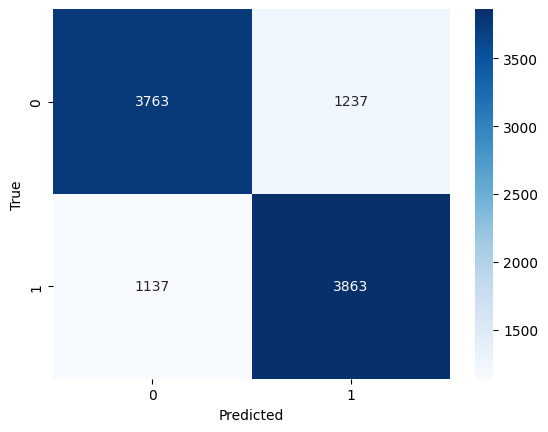

In [15]:
y_predic_ej1 = model1.predict(x_test_norm)
print(y_predic_ej1)
y_predic_cat_ej1 = np.where(y_predic_ej1>0.49,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_ej1,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

metricas(ds_validacion.y_pred, ds_validacion.y_real)

In [16]:
review_split.to_csv('train_500.csv', index=False)

In [17]:
def analisis(a,b):
    valor  = b.predict(a).probas
    return [valor['POS'],valor['NEU'],valor['NEG']]
review_split = review_t
#review_split = review_split.sample(frac=0.5, random_state=1)
#review_split=review.drop([target], axis='columns', inplace=False)
review_split['review_es'] = review_split['review_es'].apply(lambda x: x[:500])
review_split['analize'] = review_split['review_es'].apply(analisis,b=analyzer)
review_split['POS'] = review_split['analize'].apply(lambda x: x[0])
review_split['NEU'] = review_split['analize'].apply(lambda x: x[1])
review_split['NEG'] = review_split['analize'].apply(lambda x: x[2])
review_split['prediccion'] = review_split['analize'].apply(lambda x: x[0]>x[2])
review_split.head()

,review_es,analize,POS,NEU,NEG,prediccion
0,La mayor virtud de esta película es su existen...,"[0.6637440919876099, 0.27532467246055603, 0.06...",0.663744,0.275325,0.060931,True
1,"No soy un experto cinéfilo, pero pocas veces m...","[0.0035285428166389465, 0.03873526677489281, 0...",0.003529,0.038735,0.957736,False
2,Si no eres un incondicional del humor estilo T...,"[0.004527655895799398, 0.031221570447087288, 0...",0.004528,0.031222,0.964251,False
3,"No sé qué está pasando, si la gente se deja ll...","[0.015060425736010075, 0.05843944102525711, 0....",0.015060,0.058439,0.926500,False
4,"Pero cuando amanece,y me quedo solo,siento en ...","[0.7384171485900879, 0.19529373943805695, 0.06...",0.738417,0.195294,0.066289,True


In [18]:
review_split.drop('analize', axis='columns', inplace=True)
review_split.drop('review_es', axis='columns', inplace=True)
review_split.head()

,POS,NEU,NEG,prediccion
0,0.663744,0.275325,0.060931,True
1,0.003529,0.038735,0.957736,False
2,0.004528,0.031222,0.964251,False
3,0.015060,0.058439,0.926500,False
4,0.738417,0.195294,0.066289,True


In [19]:
review_split.to_csv('test_500.csv', index=False)

In [20]:
# stand_scaler = StandardScaler()
# x_train_norm = stand_scaler.fit_transform(x_train)

In [21]:
# y_predic = modelo_hotel_4.predict(hotel_t_norm)
# y_predic_cat = np.where(y_predic>0.5,1,0)
# print(len(y_predic_cat))

In [22]:
# array = []
# for i in y_predic_cat:
#     array.append(i[0])
# print(len(array))

In [23]:
# entregable = pd.DataFrame({'id': hotel_orig['id'], 'is_canceled':pd.Series(array).astype(int)})

# entregable.head()

In [24]:
#entregable.to_csv('redes_predictions.csv', index=False)